## Import libraries

In [1]:
# imports from custom library
import sys
sys.path.append('../../')
import matplotlib.pyplot as plt
plt.rc('text', usetex=True)
from mlrefined_libraries import convnets_library as convlib
from mlrefined_libraries import basics_library as baslib
from mlrefined_libraries import superlearn_library as superlearn
from mlrefined_libraries import multilayer_perceptron_library as network_lib

import autograd.numpy as np
from autograd.misc.flatten import flatten_func
from autograd import grad as compute_grad   

import autograd.numpy as np
import pandas as pd
import cv2
import csv
import pickle
import glob
import time
import copy

#this is needed to compensate for matplotlib notebook's tendancy to blow up images when plotted inline
%matplotlib notebook
from matplotlib import rcParams
rcParams['figure.autolayout'] = True

%load_ext autoreload
%autoreload 2

# Faces dataset just pixels - no index location

In [2]:
demo = network_lib.network_learner.Network()

# load in dataset
datapath = '../../mlrefined_datasets/convnet_datasets/feat_face_data.csv'
data = np.loadtxt(datapath,delimiter = ',')

In [3]:
# load in data - for this one split up training and testing
ind = np.random.permutation(len(data))

In [4]:
# split it up
data_train = data[ind[:-2000],:]
data_test = data[ind[-2000:],:]
demo.input_data(data_train,data_test,normalize = True)

In [5]:
# choose cost function
demo.choose_cost(cost_name = 'twoclass_softmax')

# setup network architecture
activation_name = 'linear'
layer_sizes = [np.shape(data_train)[1]-1,1,1]
demo.architecture_settings(activation_name,layer_sizes)

# setup optimizer
demo.optimizer_settings(alpha = 10**(-1),max_its = 100,version = 'normalized',scale = 0.1)

# fit
demo.fit(verbose = True)

<IPython.core.display.Javascript object>


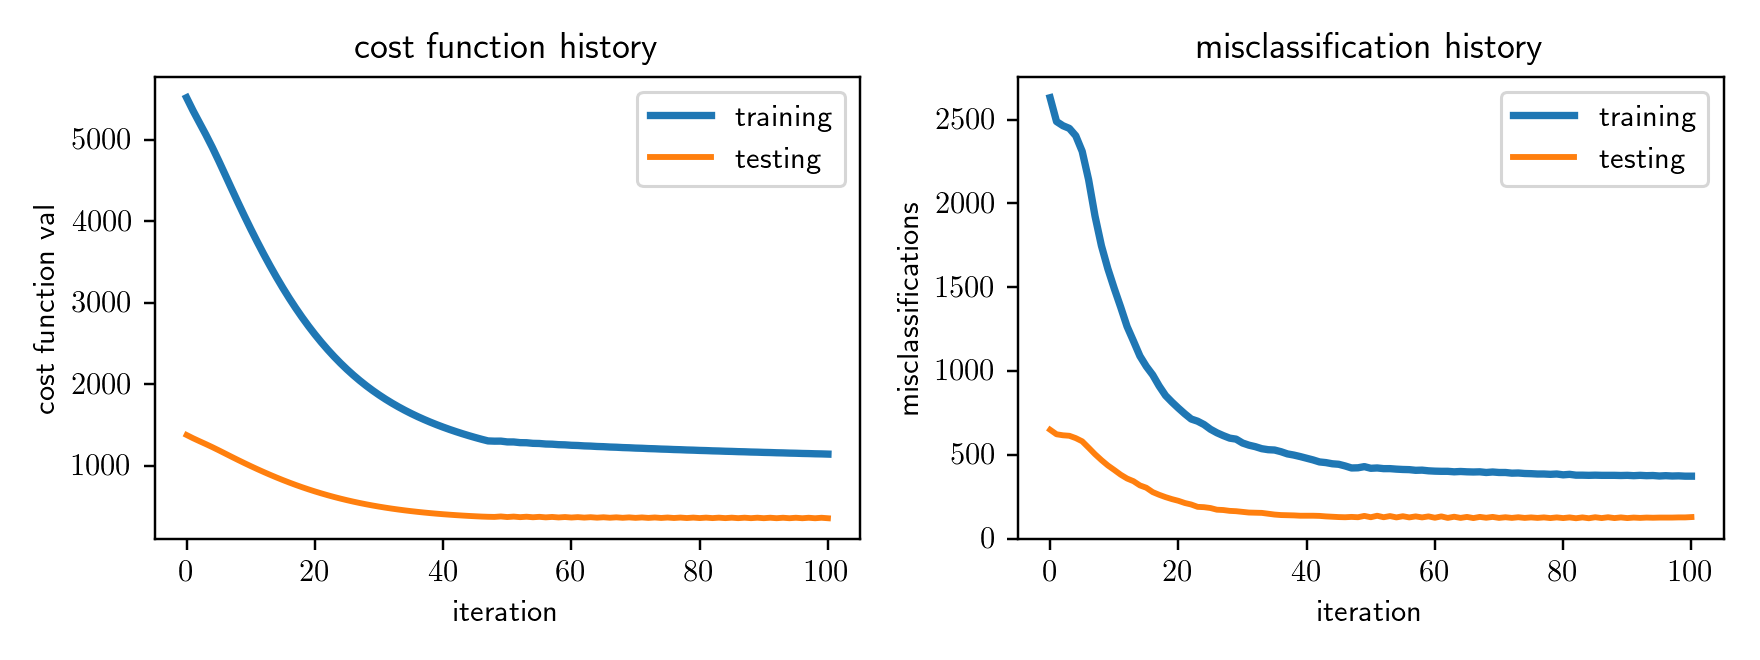

In [6]:
# compute cost plots on training and testing data
demo.compute_cost_plots()

# produce cost functio plots for training and testing data
demo.plot_histories(start = 0)

In [7]:
print (min(demo.test_count_history))
print (min(demo.train_count_history))

[ 121.]
[ 372.]


# Faces dataset just pixels - with index location

In [8]:
#### generate index sequence for pixels ####
# whats the input shape of each image again?
input_shape = (int( (np.shape(data)[1]-1)**(0.5)),int((np.shape(data)[1]-1)**(0.5)))

In [9]:
#  create index set for pixels
indy,indx = np.meshgrid(np.arange(28),np.arange(28))
indx.shape = (np.size(indx),1)
indy.shape = (np.size(indy),1)
patch_indices = np.concatenate((indx,indy),axis = 1)

In [10]:
# generate new input attaching indicies
new_input = []
X = data[:,:-1]
y = data[:,-1]
for i in range(np.shape(X)[0]):
    # reshape to square and transpose
    img = X[i]
    img_square = img.reshape(28,28).T
    
    # flatten again but add indices
    img_square = img_square.reshape(len(img),1)
    new_img = np.concatenate((patch_indices,img_square),axis = 1)
    
    # now flatten indexed image
    new_img = new_img.reshape(np.size(new_img),1)
    
    # store
    new_input.append(new_img)
    
# convert to array and shape appropriately
new_X = np.asarray(new_input)[:,:,0]

In [11]:
# concatenate new indexed input with labels and roll out
new_data = np.concatenate((new_X,y[:,np.newaxis]),axis = 1)

In [12]:
# split into training and testing
data_train = new_data[ind[:-2000],:]
data_test = new_data[ind[-2000:],:]
demo.input_data(data_train,data_test,normalize = True)

In [13]:
# choose cost function
demo.choose_cost(cost_name = 'twoclass_softmax')

# setup network architecture
activation_name = 'linear'
layer_sizes = [np.shape(data_train)[1]-1,1,1]
demo.architecture_settings(activation_name,layer_sizes)

# setup optimizer
demo.optimizer_settings(alpha = 10**(-1),max_its = 100,version = 'normalized',scale = 0.1)

# fit
demo.fit(verbose = True)

<IPython.core.display.Javascript object>


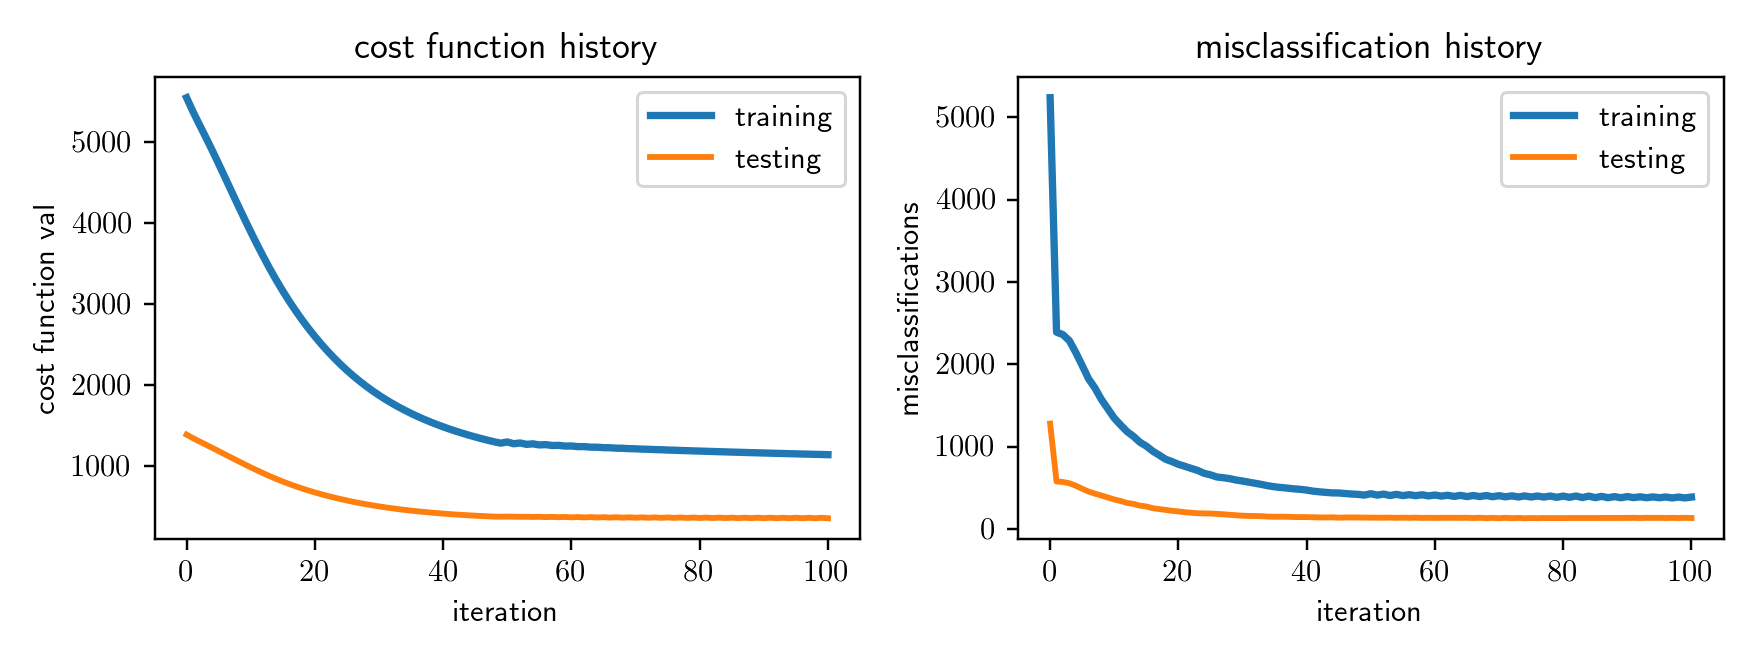

In [14]:
# compute cost plots on training and testing data
demo.compute_cost_plots()

# produce cost functio plots for training and testing data
demo.plot_histories(start = 0)

In [20]:
print (min(demo.test_count_history))
print (min(demo.train_count_history))

[ 131.]
[ 378.]


In [16]:
np.shape(demo.weight_history[-1])

(2,)

In [17]:
np.shape(demo.weight_history[1][0])

(1, 2353, 1)

In [21]:
a = demo.weight_history[3]

In [25]:
a

[[array([[-0.07697469],
         [-0.10036369],
         [ 0.01238246],
         ..., 
         [ 0.09630586],
         [ 0.13880293],
         [ 0.03386445]])], array([[-0.25104528],
        [ 0.14208841]])]